## Part 1 - Validation of Roundshot Cloud Fraction Retrieval Method  Utilizing Airport Surface Observation Station (ASOS) Celiometer Data

In this section, we will be looking at an analysis between the Airport Surface Observation Station cloud fraction product at Huntsville International Airport (HSVIA) and comparing it to a roundshot derived methodology utilizing high resolution (10,771 x 2048) images from the University of Alabama Huntsville (UAH). 

### Goals

1. Observe the location of the celiometer in relationship to the roundshot camera. 
2. Discuss how cloud fraction is derived at an ASOS station. 
3. Demonstrate methodology to get cloud fraction utilizng the roundshot camera. 
4. Analyze some statistical relationships between data from different sensors as well as insights gained. 

## Part 2 - (Update) Compute Problems in Cloud Object Detection Project
1. Discuss ssd_mobilenet_v1_coco model architecture.
2. Analyze compute resources necessary for model solution. 
3. Provide details on next steps on where this project is going. 

## <center> Part 1, Goal 1: Location of Roundshot and Celiometer for Cloud Fraction Detection </center>

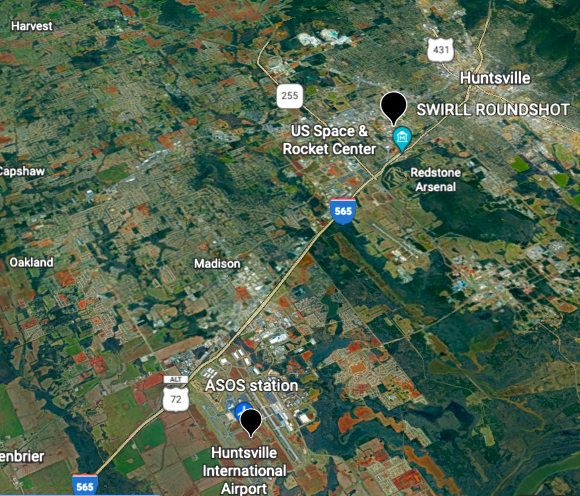

**There is an eight mile distance between the roundshot and the celiometer.** 

**Therefore, its important to understand that because these two sensors are not co-located, there could be large errors in what the celiometer is seeing compared to the camera at UAH.**

In this study, I make the assumption that the error is not large enough to matter. This assumption could be wrong. 

With that being said, I think one *key* data strategy could be changed in the future if this method is repeated:

- It may be better to colocate a roundshot camera with the celiometer to make sure location assumptions do not have to be made.

## <center> Part 1, Goal 2: Cloud Fraction Derivations using ASOS Station </center>

Next we will discuss how cloud fraction is derived using a celiometer at the HSVIA ASOS station. The information for this section comes from [Chapter 4](https://www.weather.gov/media/asos/aum-toc.pdf) of the National Weather Service ASOS handbook. 

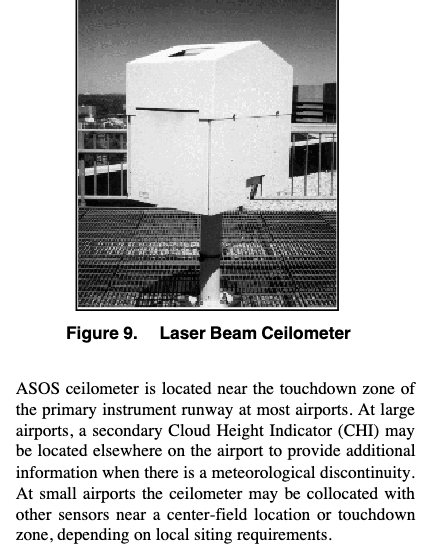

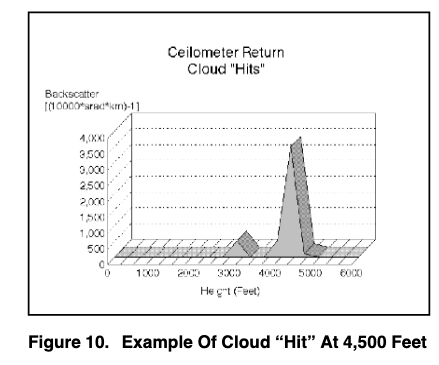

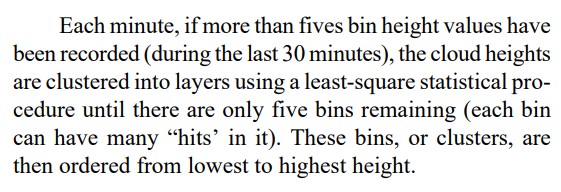

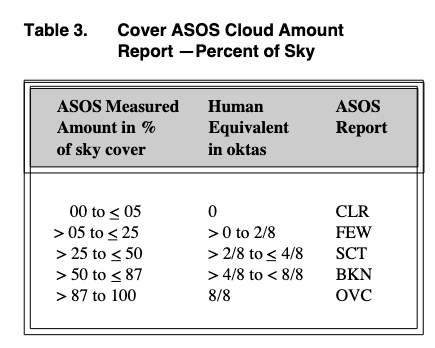

What are Oktas? 

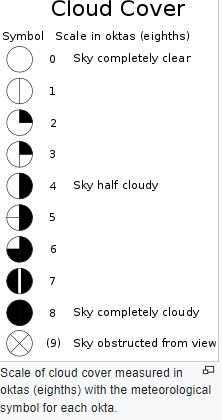

[Wiki definition:](https://en.wikipedia.org/wiki/Okta) 

**In meteorology, an okta is a unit of measurement used to describe the amount of cloud cover at any given location such as a weather station.**

**Sky conditions are estimated in terms of how many eighths of the sky are covered in cloud, ranging from 0 oktas (completely clear sky) through to 8 oktas (completely overcast).**

## <center> Part 1, Goal 3: Cloud Fraction Derivations using a Roundshot Camera </center>

To understand how we gather cloud fraction from a roundshot camera, we should look at some underlying science that has been established. For example, in the next few cells I will show how to calculate cloud cover and demonstrate with some code. 

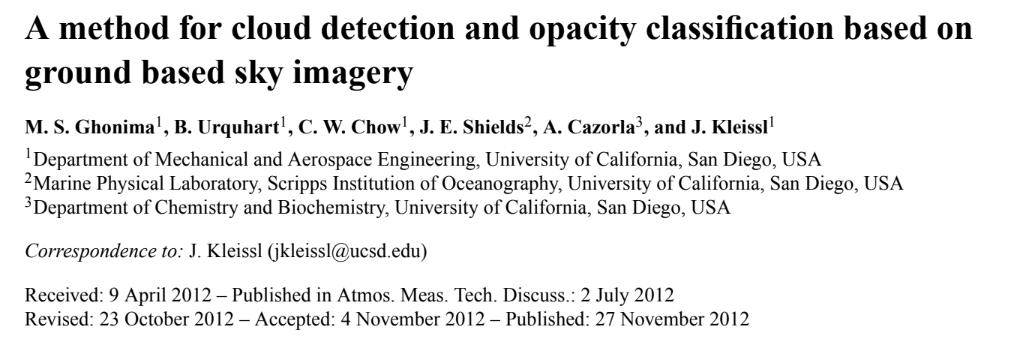

In the paper above, they provide some details on how to mathematically get cloud cover from a three-dimensional image. Here is the math:


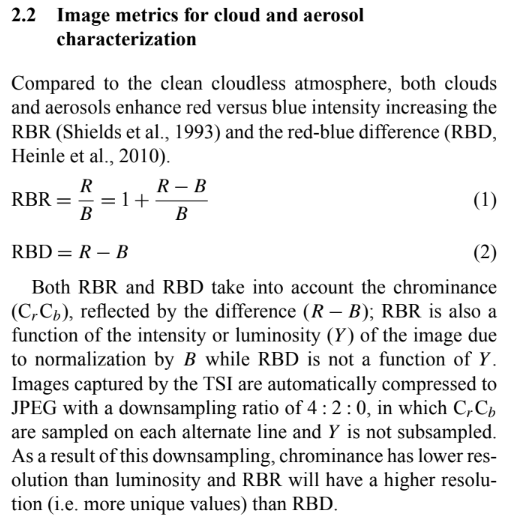

Once the red-blue difference has been established for each pixel, you can set a threshold for pixels that are more cloud than aerosol and then classify the image in oktas. 

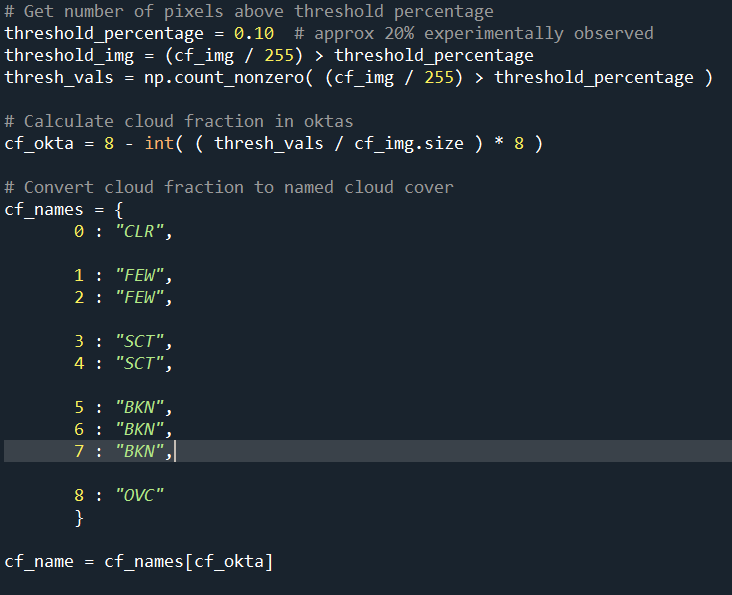

## Plot demonstration for an image taken March 8, 2020:

In [8]:
%matplotlib inline

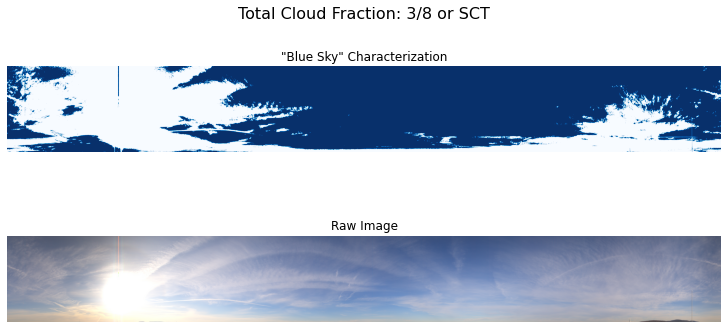

<Figure size 432x288 with 0 Axes>

In [14]:
%run /Users/cwalker/Desktop/swirllcam/swirll-cam-cloud-classifier/function-modules/plot_cloudfraction.py

## <center> Part 1, Goal 4: Statistical Relationships between Data from Different Sensors </center>
   

### Methodology 
1. Calculate cloud fraction for each image (1500 images total)
2. For dates where two images were taken, get the mean cloud fraction
3. Create a mean cloud fraction for the three heights observed at HSVIA
4. Merge daily HSVIA data with daily SWIRLL data
5. Plot correlation coeficient

In [18]:
import sys
sys.path.insert(0, '/Users/cwalker/Desktop/swirllcam/swirll-cam-cloud-classifier/function-modules/')

In [19]:
from cloud_fraction_functions import *

In [20]:
df = merge()

In [21]:
df

,Swirll Cloud Class,HSV ASOS Cloud Class
Date,,
2020-01-01 07:00:00,2.0,0.000000
2020-01-01 08:00:00,2.0,0.000000
2020-01-02 10:00:00,4.0,4.000000
2020-01-02 13:00:00,4.0,3.750000
2020-01-03 08:00:00,4.0,3.666667
...,...,...
2020-12-29 13:00:00,3.0,0.000000
2020-12-29 15:00:00,3.0,2.500000
2020-12-30 12:00:00,2.0,4.000000


Text(0.5, 1.0, 'January Cloud Class')

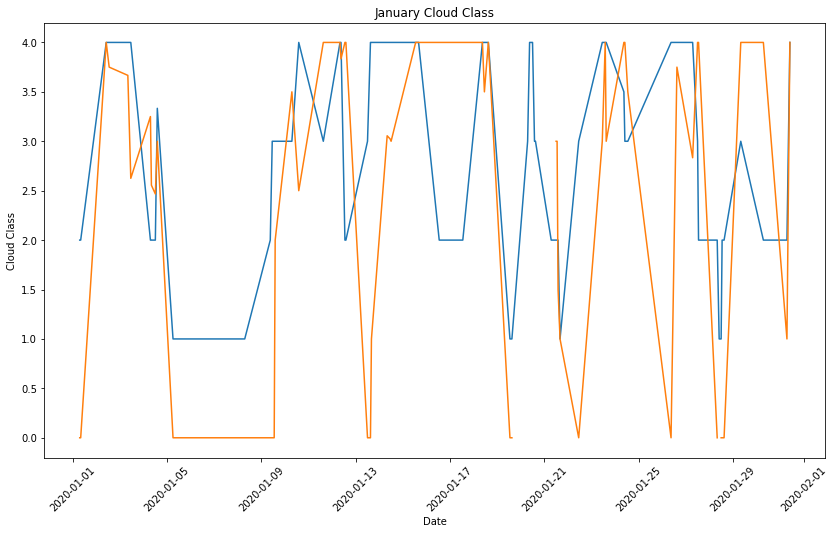

In [40]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df[df.index.month==1])
plt.xticks(rotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('Cloud Class')
ax.set_title('January Cloud Class')

In [41]:
import seaborn as sns

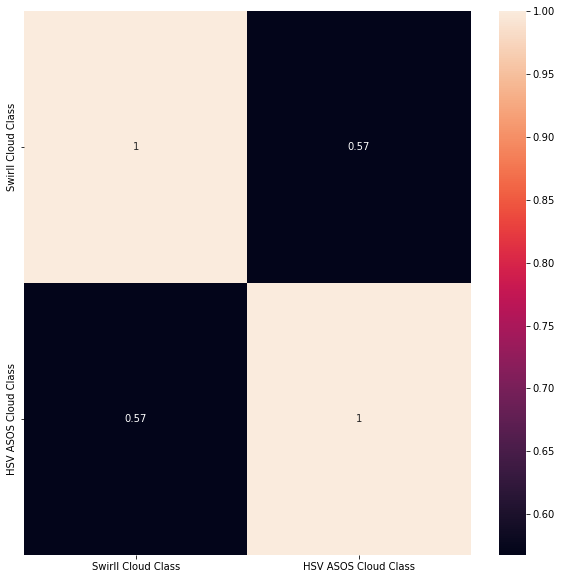

In [47]:
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2 = sns.heatmap(df.corr(), annot=True, ax=ax2)

## <center> Part 2, Goal 1: Discuss ssd_mobilenet_v1_coco model architecture </center>

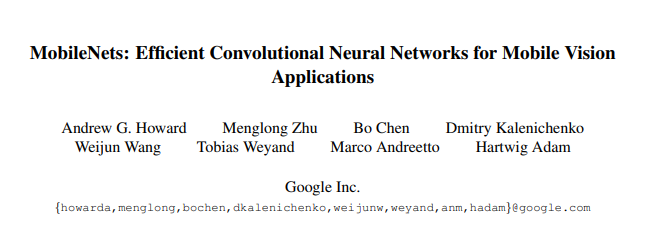
In the paper above, they discuss what the "Single shot detector" mobilenet model is. Here is an image detailing how they seperate standard convolution into depthwise and pointwise steps to achive lower computational requirements:

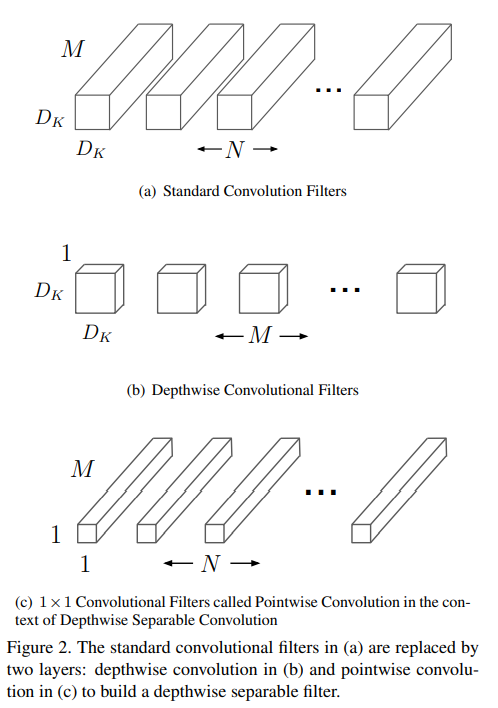

Here is the math to showing how seperating depthwise convolutions into two steps reduces computational demand. 

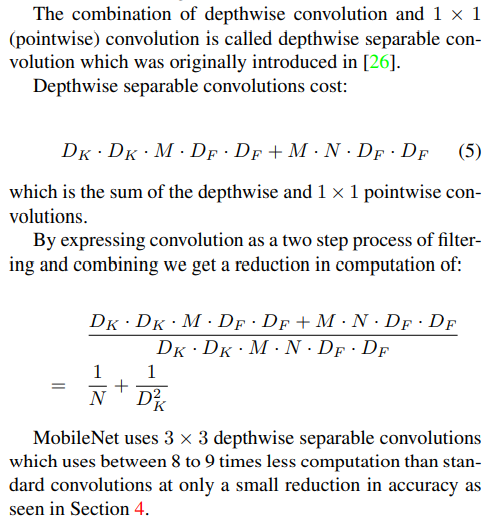

## <center> Part 2, Goal 2: Number of computations for images with size 10,771 x 2048 </center>

In [52]:
#assume 4x4 depthwise that steps across the image horizontally 
kernal = 4*4
print('Size of depthwise kernal: {}'.format(kernal) + ' ' + 'pixels')

Size of depthwise kernal: 16 pixels


In [58]:
imagewidth = 10771
imageheight = 2048
print('Size of image width: {}'.format(imagewidth) + ' ' + 'pixels')
print('Size of image height: {}'.format(imageheight) + ' ' + 'pixels')

Size of image width: 10771 pixels
Size of image height: 2048 pixels


In [64]:
#number of depthwize calculations across horizontal and vertical:
step_number_width = imagewidth/4
step_number_height = imageheight/4
depthwise_computations = kernal * step_number_width * step_number_height
print('The number of pixels needing computation for depth-wise convolution in each image is {}'.format(depthwise_computations))

The number of pixels needing computation for depth-wise convolution in each image is 22059008.0


In [71]:
#number of pointwise calculations = area of image * three channels for RGB 
#dividing by 1 to make a float
pointwise_computations = imagewidth*imageheight*3/1
print('The number of pixels needing computation for point-wise convolution in each image is {}'.format(pointwise_computations))

The number of pixels needing computation for point-wise convolution in each image is 66177024.0


In [104]:
#barplot
data = {'depthwise': depthwise_computations, 'pointwise': pointwise_computations}
df = pd.DataFrame(data, index=['computations'])
df['standard convolution'] = df['depthwise'] + df['pointwise']

Text(0.5, 0, 'Convolution Style')

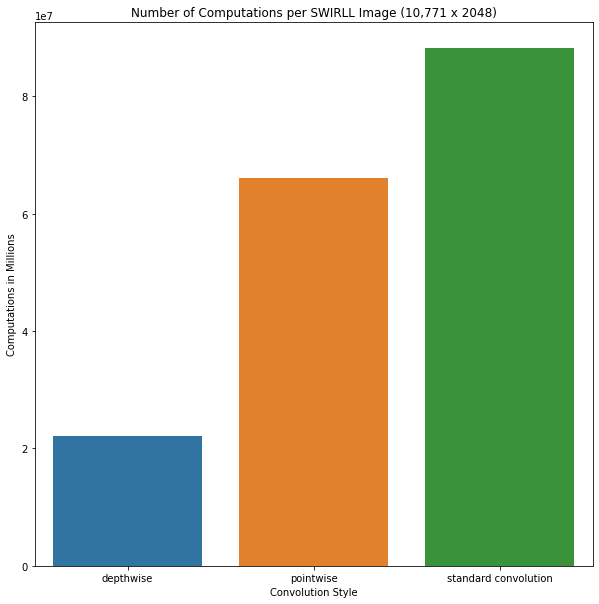

In [105]:
fig3, ax3 = plt.subplots(figsize=(10,10))
ax = sns.barplot(data=df, ax=ax3)
ax.set_title('Number of Computations per SWIRLL Image (10,771 x 2048)')
ax.set_ylabel('Computations in Millions')
ax.set_xlabel('Convolution Style')

[Here, I will link an example of trying to use Colab Pro with access to 26GB of RAM](https://colab.research.google.com/drive/1ihFlfsSI9_VrUylEY37rC-uWDmgOxXdY?usp=sharing) using p100 GPU. However, the following picture is what occured when I tried to train on high resolution images: 

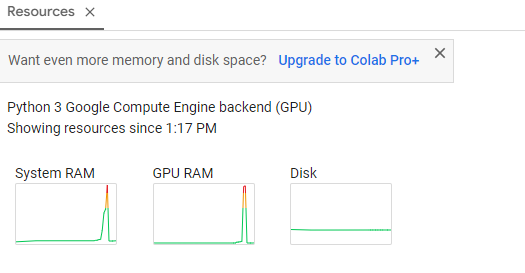

## <center> Part 2, Goal 3: Next Steps </center>

* I may try a "high-ram" v100 GPU with 54GB RAM, but it comes at a cost: $50 for a month access
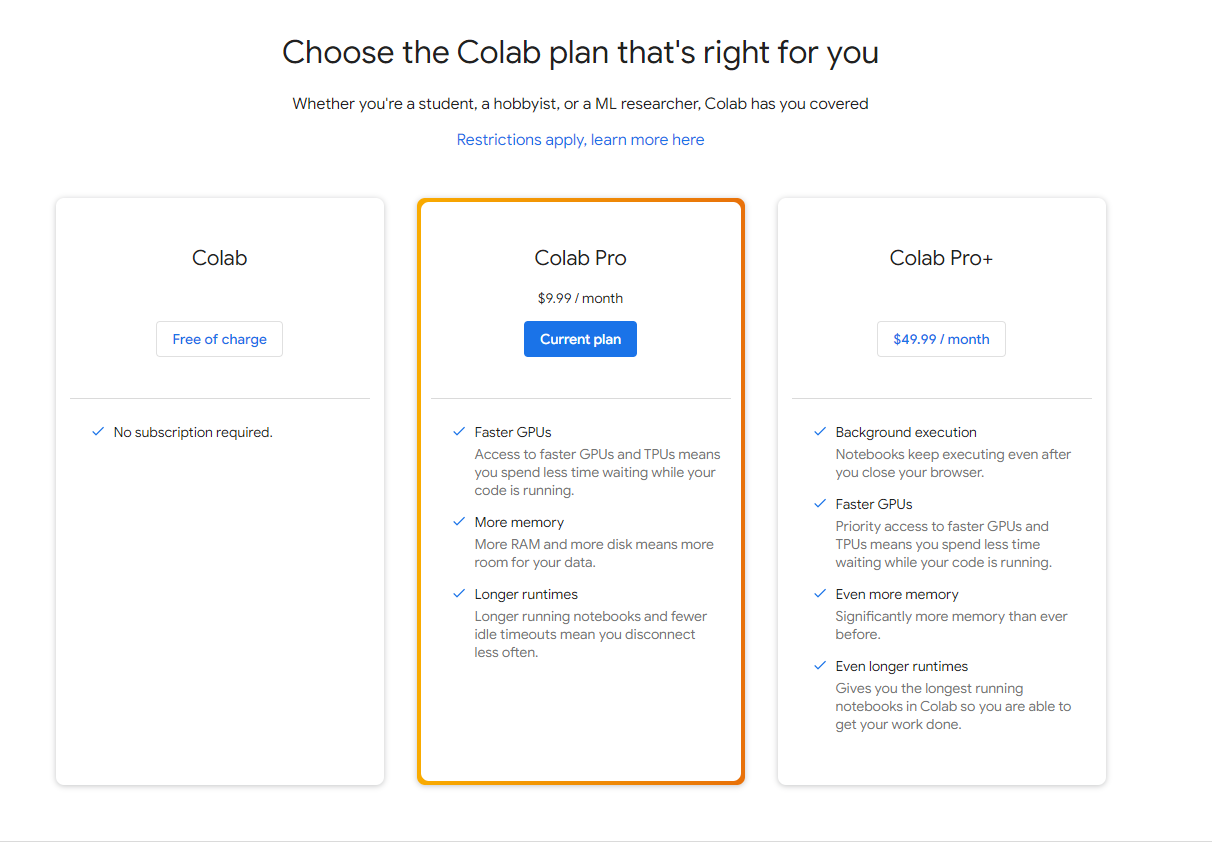


* I have also looked at training this model with Tensor Processing Units that Google offers, which allow more precision over accuracy in the model by decreasing throughput or how much demand on memory there is while training. These cost about $4 per hour but there are not easy mechanisms of connecting them to the Colab environment. 

* Ryan got back with me this morning saying that we have a matrix solution by running the model locally on 3 GPU's, but we are not certain it will work because it's never been done at NSSTC with students.

* I have also talked to some folks at NASA IMPACT and one of them sent me a [program](https://fsspec.github.io/kerchunk/) that can break the large images into smaller "chunks."

# Follow the next steps on GitHub [here](https://github.com/Corey4005/swirll-cam-cloud-classifier)